In [109]:
import csv
from os import listdir
from os.path import isfile, join
from IPython.display import display, Image
import math
import matplotlib.pyplot as plt
import numpy as np
import sklearn.svm as svm
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from datetime import datetime

from IPython.display import HTML, display
import tabulate

In [9]:
times = []
values = {}

In [10]:
with open("values.csv") as f:
    r = csv.reader(f)
    for row in r:
        try:
            time = int(row[0])
            if time not in values:
                values[time] = {}
            values[time][row[1]] = {
                'time': time, 
                'sensor': row[1],
                'sensor_type': row[2],
                'x': float(row[3]),
                'y': float(row[4]),
                'z': float(row[5]),
            }
            times = times + [time]
        except:
            pass

In [11]:
len(values)

3084

In [12]:
len(times)

17302

In [13]:
times.sort()

In [14]:
with open('scores.csv') as f:
    r = csv.reader(f)
    for row in r:
        time = int(row[0][:-4])
        label = row[1]
        values[time]['label'] = label

In [19]:
U = [x for x in times if 'label' in values[x] and values[x]['label'] != 'n/a']

In [20]:
len(U)

4779

In [21]:
U.sort()

In [29]:
def fmtTime(t):
   return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

In [38]:
last = U[0]
table = []
for x in U:
    if x - last > 30:
        table = table + [[x-last, fmtTime(x), fmtTime(last), x]]
    last = x

In [39]:
display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [42]:
period = [1567193424, U[-1]]
period

[1567193424, 1567269692]

In [174]:
V = {}
for t in U:
    ok = True
    if t < period[0] or t > period[1]:
         ok = False
    for i in range(1, 6):
        if not str(i) in values[t]:
            ok = False
    if ok:
        V[t] = values[t]

In [176]:
W = {}
for t in times:
    ok = True
    if t < period[0] or t > period[1]:
         ok = False
    for i in range(1, 6):
        if not str(i) in values[t]:
            ok = False
    if ok:
        W[t] = values[t]

In [47]:
V

{1567193424: {'1': {'time': 1567193424,
   'sensor': '1',
   'sensor_type': 'LSM9DS1',
   'x': 7.82,
   'y': 5.65,
   'z': 5.65},
  '2': {'time': 1567193424,
   'sensor': '2',
   'sensor_type': 'LSM9DS1',
   'x': 3.23,
   'y': 7.75,
   'z': 7.75},
  '3': {'time': 1567193424,
   'sensor': '3',
   'sensor_type': 'MPU9250',
   'x': -0.5,
   'y': -0.89,
   'z': -0.14},
  '4': {'time': 1567193424,
   'sensor': '4',
   'sensor_type': 'MPU9250',
   'x': 0.85,
   'y': -0.29,
   'z': 0.57},
  '5': {'time': 1567193424,
   'sensor': '5',
   'sensor_type': 'MPU9250',
   'x': -0.98,
   'y': -0.19,
   'z': 0.13},
  'label': '-2'},
 1567193555: {'1': {'time': 1567193555,
   'sensor': '1',
   'sensor_type': 'LSM9DS1',
   'x': 5.48,
   'y': 8.11,
   'z': 8.11},
  '2': {'time': 1567193555,
   'sensor': '2',
   'sensor_type': 'LSM9DS1',
   'x': 3.04,
   'y': 6.26,
   'z': 6.26},
  '3': {'time': 1567193555,
   'sensor': '3',
   'sensor_type': 'MPU9250',
   'x': -0.52,
   'y': -0.91,
   'z': -0.04},
  '4':

In [177]:
len(V), len(W)

(33, 936)

In [71]:
GOOD = [x for x in V if V[x]['label'] == '2']
BAD = [x for x in V if V[x]['label'] == '-2']
len(GOOD), len(BAD)

(20, 13)

In [58]:
S = V[BAD[0]]

In [59]:
def mag(a):
    return math.sqrt(a[0] ** 2 + a[1] ** 2 + a[2] ** 2)

In [60]:
def process(w):
    for i in range(1, 6):
        t = w[str(i)]
        t['xyz'] = [t['x'], t['y'], t['z']]
        m = mag(t['xyz'])
        t['xyz'] = np.array([t['x']/m, t['y']/m, t['z']/m])

In [185]:
for x in V:
    process(V[x])
for x in W:
    process(W[x])

In [73]:
S

{'1': {'time': 1567193424,
  'sensor': '1',
  'sensor_type': 'LSM9DS1',
  'x': 7.82,
  'y': 5.65,
  'z': 5.65,
  'xyz': array([0.69944934, 0.50535662, 0.50535662])},
 '2': {'time': 1567193424,
  'sensor': '2',
  'sensor_type': 'LSM9DS1',
  'x': 3.23,
  'y': 7.75,
  'z': 7.75,
  'xyz': array([0.28268382, 0.67826612, 0.67826612])},
 '3': {'time': 1567193424,
  'sensor': '3',
  'sensor_type': 'MPU9250',
  'x': -0.5,
  'y': -0.89,
  'z': -0.14,
  'xyz': array([-0.48525397, -0.86375206, -0.13587111])},
 '4': {'time': 1567193424,
  'sensor': '4',
  'sensor_type': 'MPU9250',
  'x': 0.85,
  'y': -0.29,
  'z': 0.57,
  'xyz': array([ 0.79908255, -0.27262816,  0.53585536])},
 '5': {'time': 1567193424,
  'sensor': '5',
  'sensor_type': 'MPU9250',
  'x': -0.98,
  'y': -0.19,
  'z': 0.13,
  'xyz': array([-0.97349926, -0.18873965,  0.12913766])},
 'label': '-2'}

In [404]:
def angle(a, b):
    v = (a[0] * b[0] + a[1] * b[1] + a[2] * b[2]) / (mag(a) * mag(b))
    return math.acos(max(min(v, 1), -1))

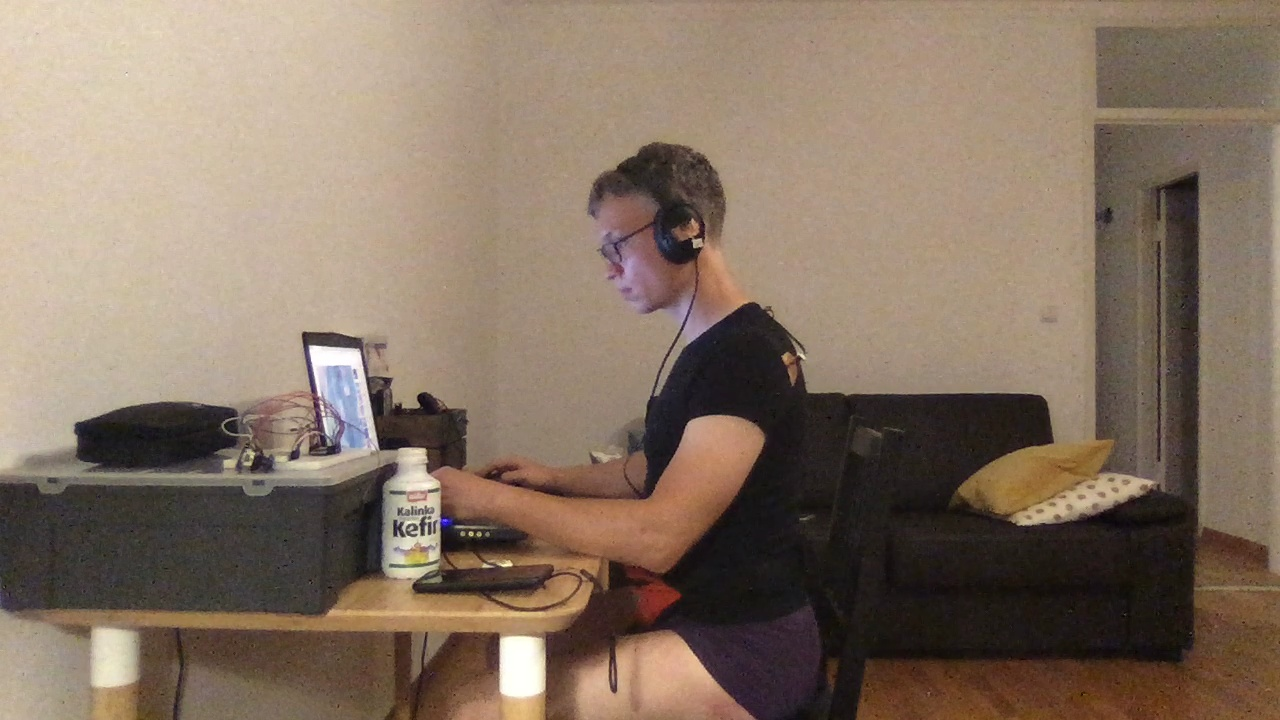

1 [0.33689599 0.66577064 0.66577064]
2 [0.23116535 0.68795442 0.68795442]
3 [-0.41403582 -0.69679198 -0.5857092 ]
4 [0.8655398  0.04704021 0.49862619]
5 [-0.93119527 -0.26747098  0.24765832]


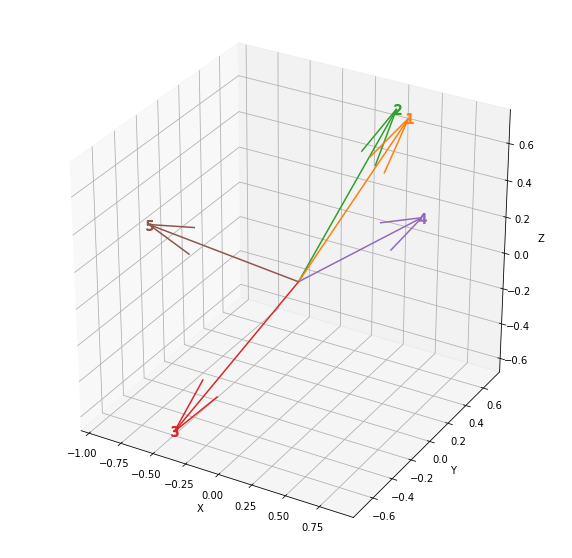

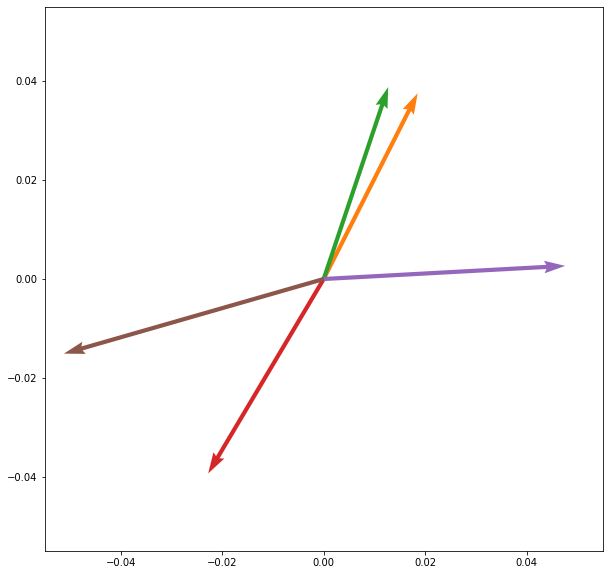

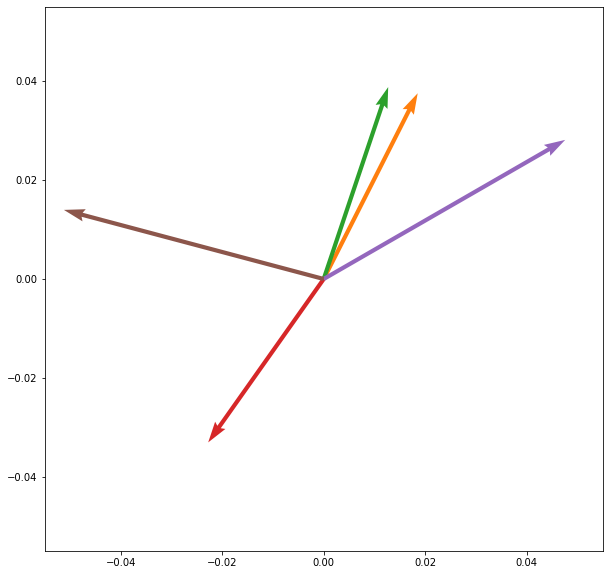

In [75]:
show(V[GOOD[0]])

In [129]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [130]:
def geta5(w, sensor, label):
    r = []
    for x in w.values():
        if x['label'] != label:
            continue
        r = r + [x[sensor]['a5']]
    return removeOutliers(r, 1.5)

In [483]:
from scipy.spatial.transform import Rotation as R
e = 0.1

def maybe_rotate(w, v, x):
    r = R.from_euler(x, v)
    k = r.apply(w['5']['xyz'])
#     print(k, w['5']['xyz'])
    if k[0] > w['5']['xyz'][0]:
#         print('rot')
        for i in range(1, 6):
            w[str(i)]['xyz'] = r.apply(w[str(i)]['xyz'])

for v in V:
    for w in v.values():
        
        b = w['5']['xyz']
#         for i in range(1, 6):
        d = 1
        while d > 0.01:
            maybe_rotate(w, d, 'X')
            maybe_rotate(w, -d, 'X')
            maybe_rotate(w, d, 'Y')
            maybe_rotate(w, -d, 'Y')
            maybe_rotate(w, d, 'Z')
            maybe_rotate(w, -d, 'Z')
            d /= 2
        w['4']['xyz'] = R.from_euler('Y', np.pi).apply(w['4']['xyz'])
#         w['4']['xyz'] = [w['4']['xyz'][0], w['4']['xyz'][2], w['4']['xyz'][1]]
#         w['4']['xyz'] = R.from_euler('X', np.pi/2).apply(w['4']['xyz'])

In [80]:
def compare_dots(axis):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for x in GOOD:
        p = V[x][axis]['xyz']
        ax.scatter(p[0], p[1], p[2], color='C1')
    for x in BAD:
        p = V[x][axis]['xyz']
        ax.scatter(p[0], p[1], p[2], color='C2')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

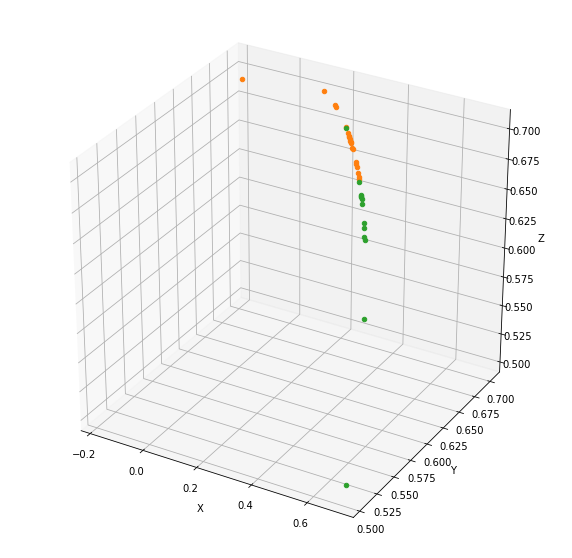

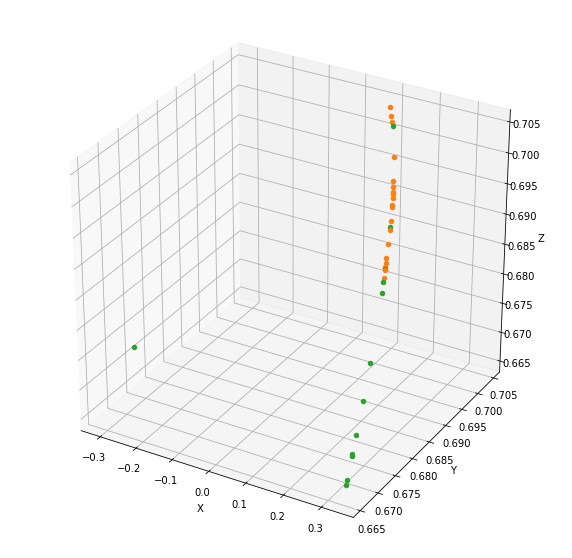

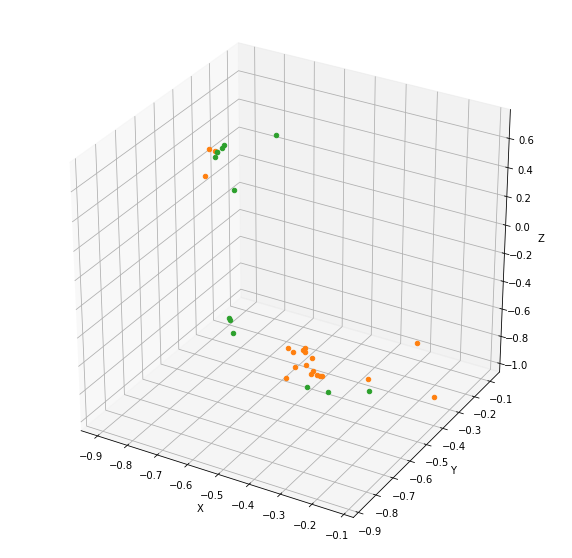

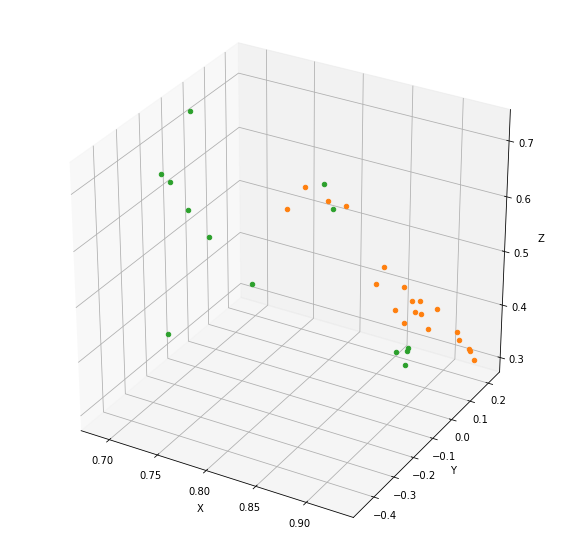

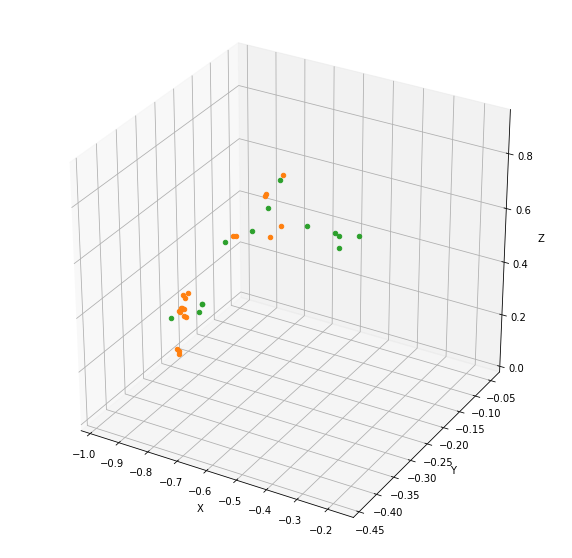

In [82]:
for i in range(1, 6):
    compare_dots(str(i))

In [83]:
from mpl_toolkits.mplot3d import Axes3D

def show(p):
    display(Image('img/' + str(p['1']['time']) + '.jpg'))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for i in range(1, 6):
        t = p[str(i)]
        c = t['xyz']
        ax.quiver(0,0,0, c[0], c[1], c[2], color=f'C{i}')
        ax.scatter(c[0], c[1], c[2],color=f'C{i}', marker=f'${i}$', s=100)
        print(i, c)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    for i in range(1, 6):
        t = p[str(i)]
        c = t['xyz']
        ax.quiver(0,0, c[0], c[1], color=f'C{i}',scale=2)
    plt.show()
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    for i in range(1, 6):
        t = p[str(i)]
        c = t['xyz']
        ax.quiver(0,0, c[0], c[2], color=f'C{i}',scale=2)
    plt.show()

In [151]:
def get_axes(v, axes):
    parts = []
    for a in axes:
        p = v[a]['xyz']
        parts += [p[0], p[1], p[2]]
    return parts

In [165]:
def make_axis_predictor(axes):
    x = []
    y = []
    for v in V.values():
        x += [get_axes(v, axes)]
        y += [int(v['label'])]
    x = np.array(x)
    y = np.array(y)
#     print(x)
#     clf = SVC(gamma='auto', probability=True, kernel='linear', C = 1.0, degree=3)
    clf = svm.SVC(gamma='auto', C=100)
    clf.fit(x, y)
    z = clf.predict(x)
#     print(y)
#     print(z)
#     plt.scatter(y, z)
#     plt.show()
    return [clf, axes]
#     pz = clf.predict_proba(x)
#     print(z, pz)

In [181]:
def diff_predictors(w, x, y):
    a = x[0]
    axa = x[1]
    b = y[0]
    axb = y[1]
    score = 0
    for i in w:
        if a.predict([get_axes(w[i], axa)]) != b.predict([get_axes(w[i], axb)]):
            score += 1
    return score

In [183]:
def score_axes(a, w):
    return diff_predictors(w, make_axis_predictor(a), make_axis_predictor(['1', '2', '3', '4', '5']))

In [186]:
for i in range(1, 32):
    a = []
    for j in range(5):
        if i & (1 << j):
            a += [str(j + 1)]
    print(a, score_axes(a, W))

['1'] 385
['2'] 266
['1', '2'] 337
['3'] 329
['1', '3'] 194
['2', '3'] 269
['1', '2', '3'] 140
['4'] 163
['1', '4'] 307
['2', '4'] 238
['1', '2', '4'] 258
['3', '4'] 156
['1', '3', '4'] 120
['2', '3', '4'] 136
['1', '2', '3', '4'] 129
['5'] 227
['1', '5'] 206
['2', '5'] 247
['1', '2', '5'] 150
['3', '5'] 258
['1', '3', '5'] 123
['2', '3', '5'] 236
['1', '2', '3', '5'] 120
['4', '5'] 180
['1', '4', '5'] 73
['2', '4', '5'] 169
['1', '2', '4', '5'] 69
['3', '4', '5'] 128
['1', '3', '4', '5'] 30
['2', '3', '4', '5'] 139
['1', '2', '3', '4', '5'] 0


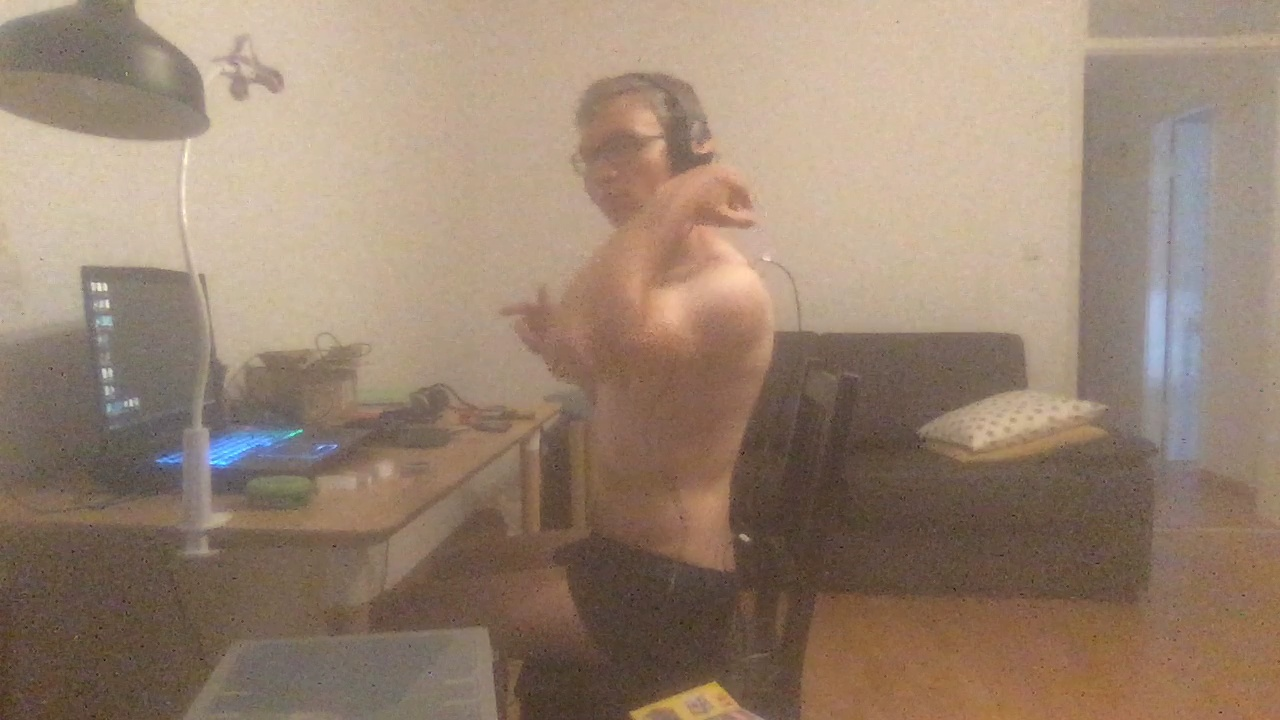

good


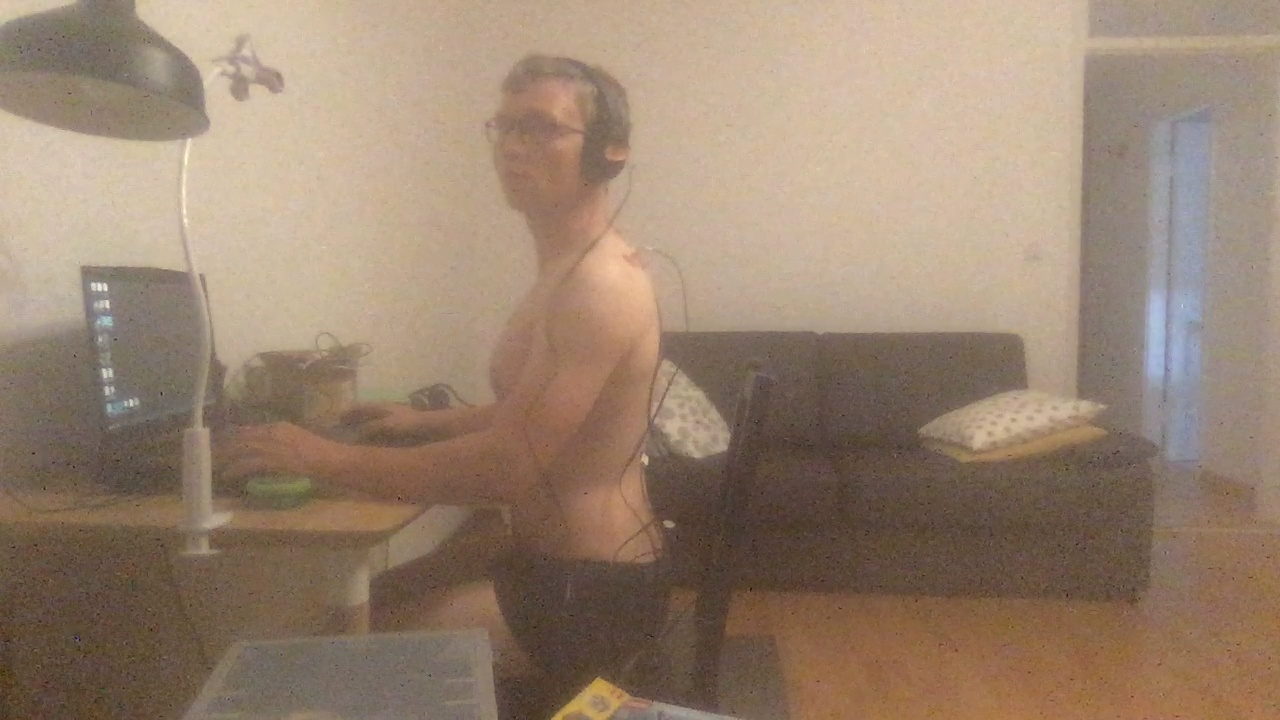

good


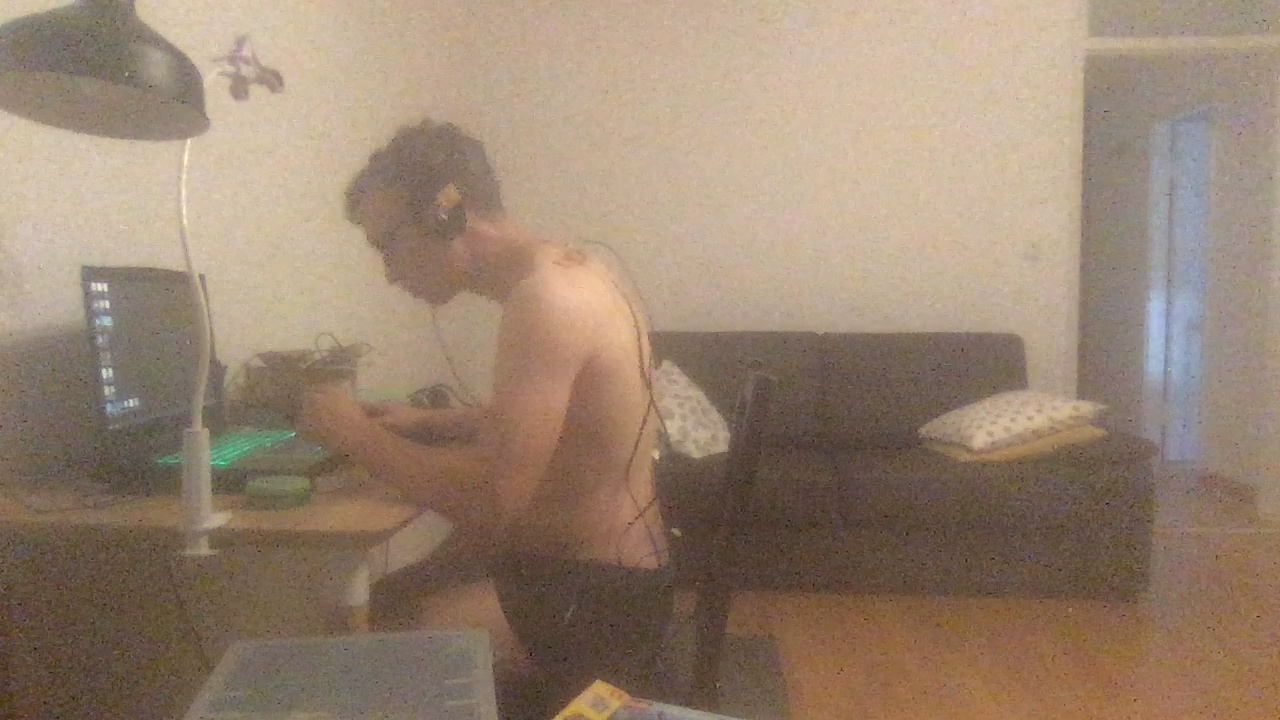

bad


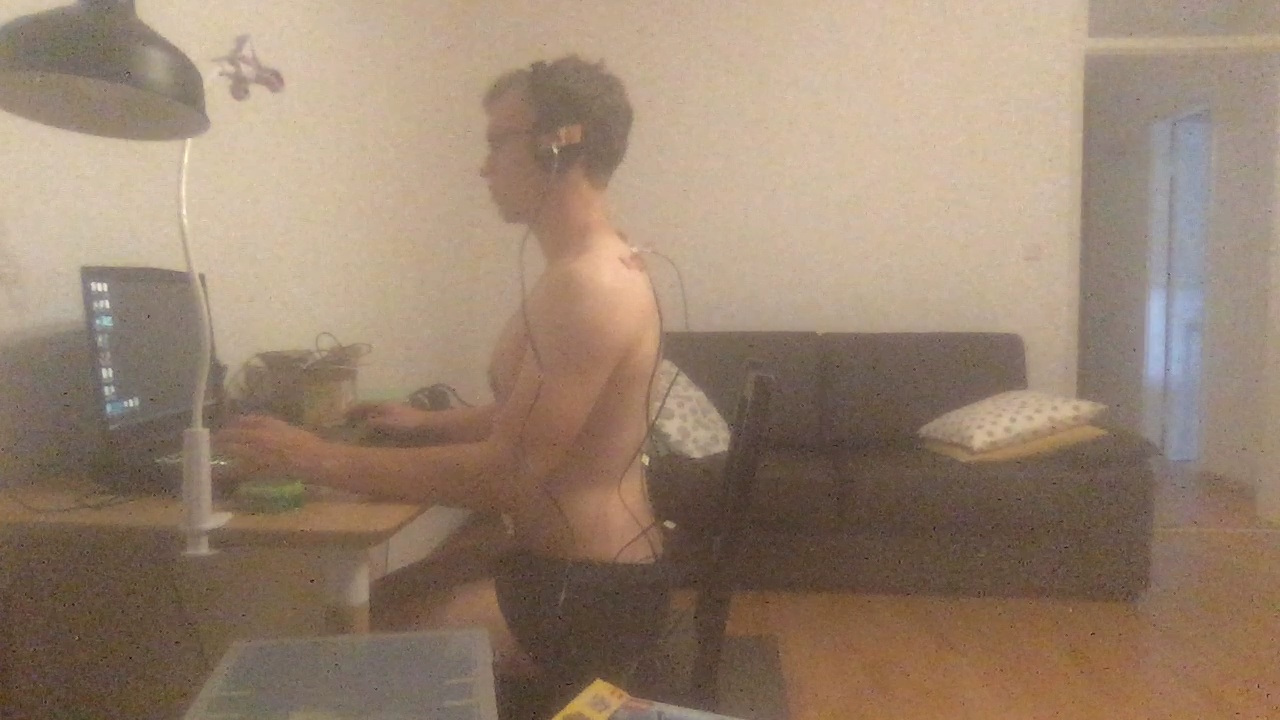

good


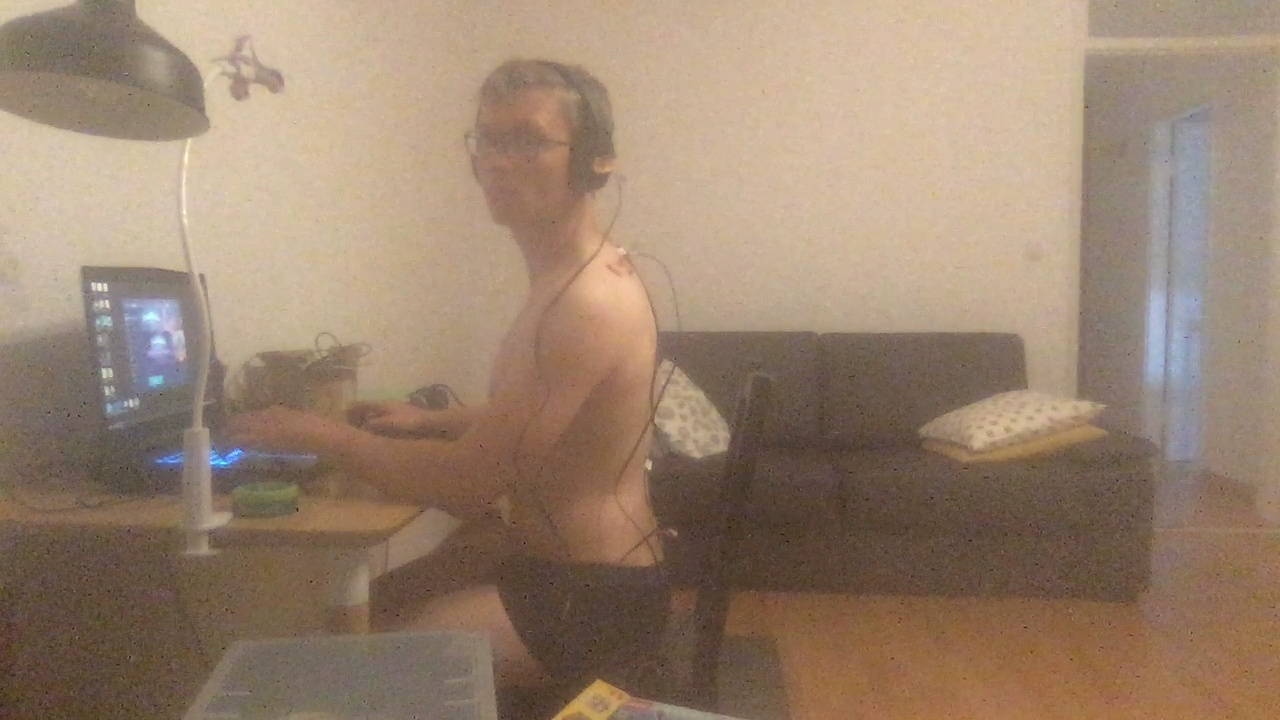

bad


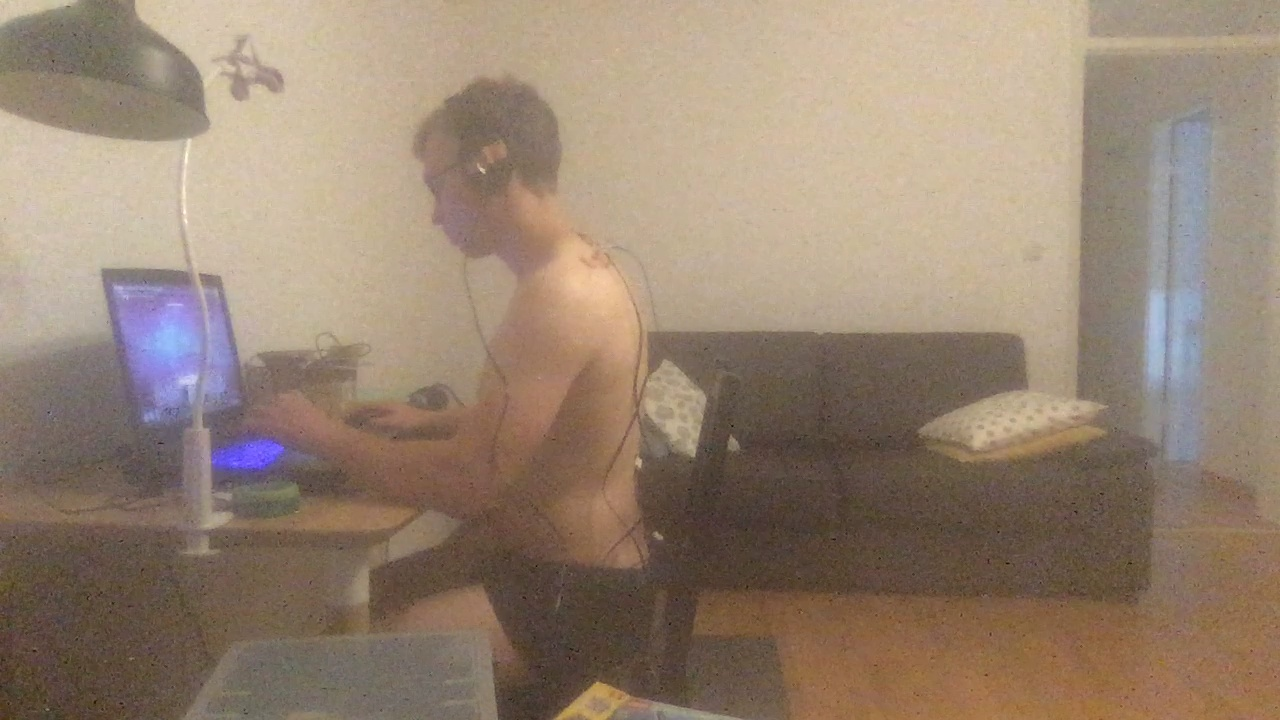

bad


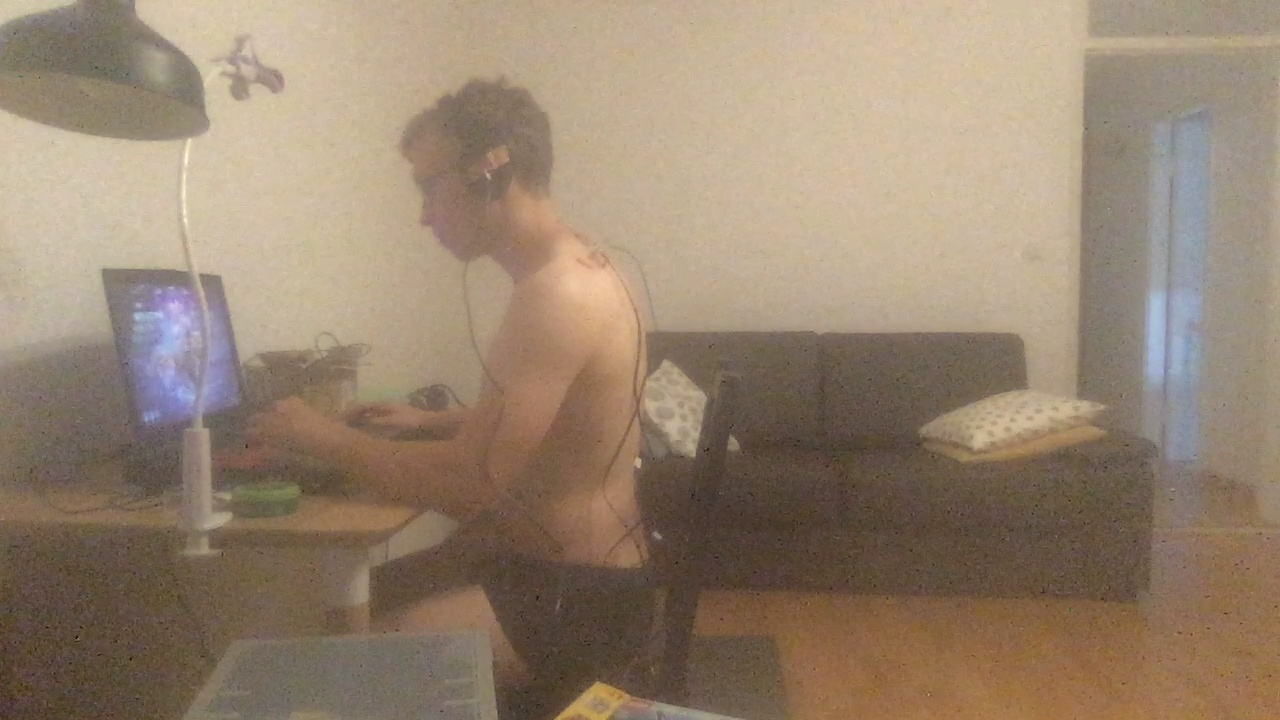

bad


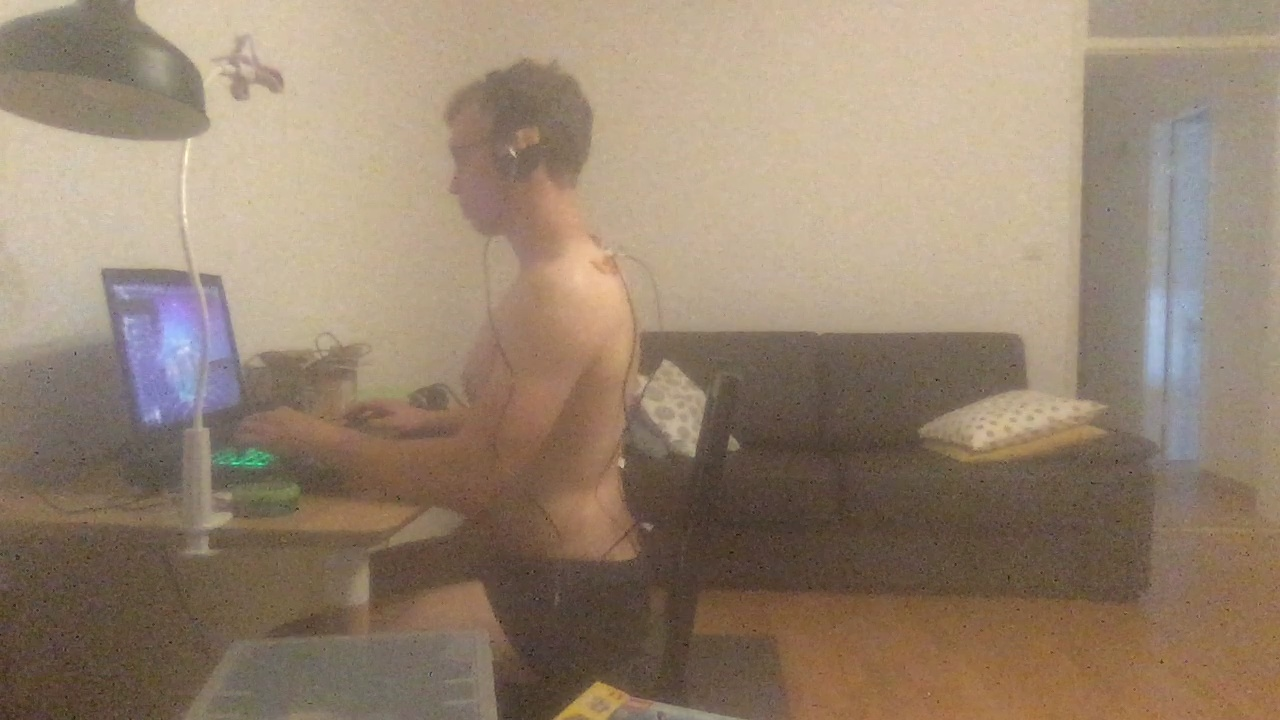

good


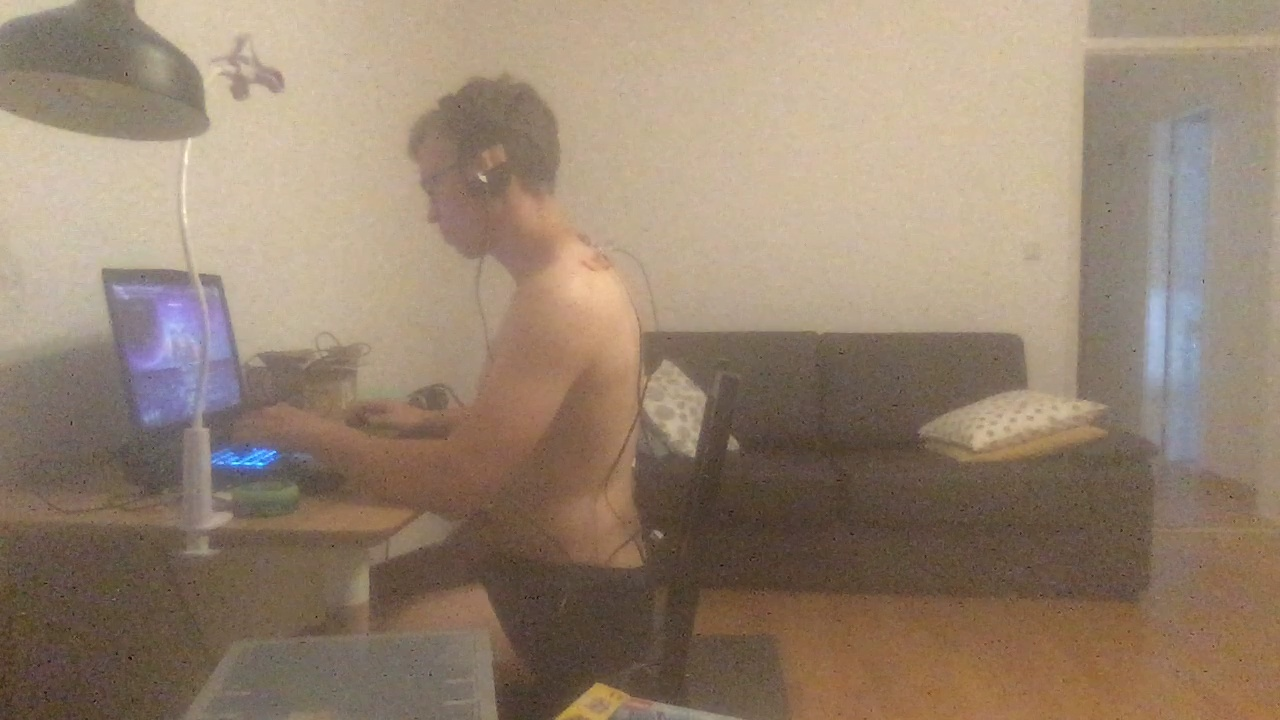

good


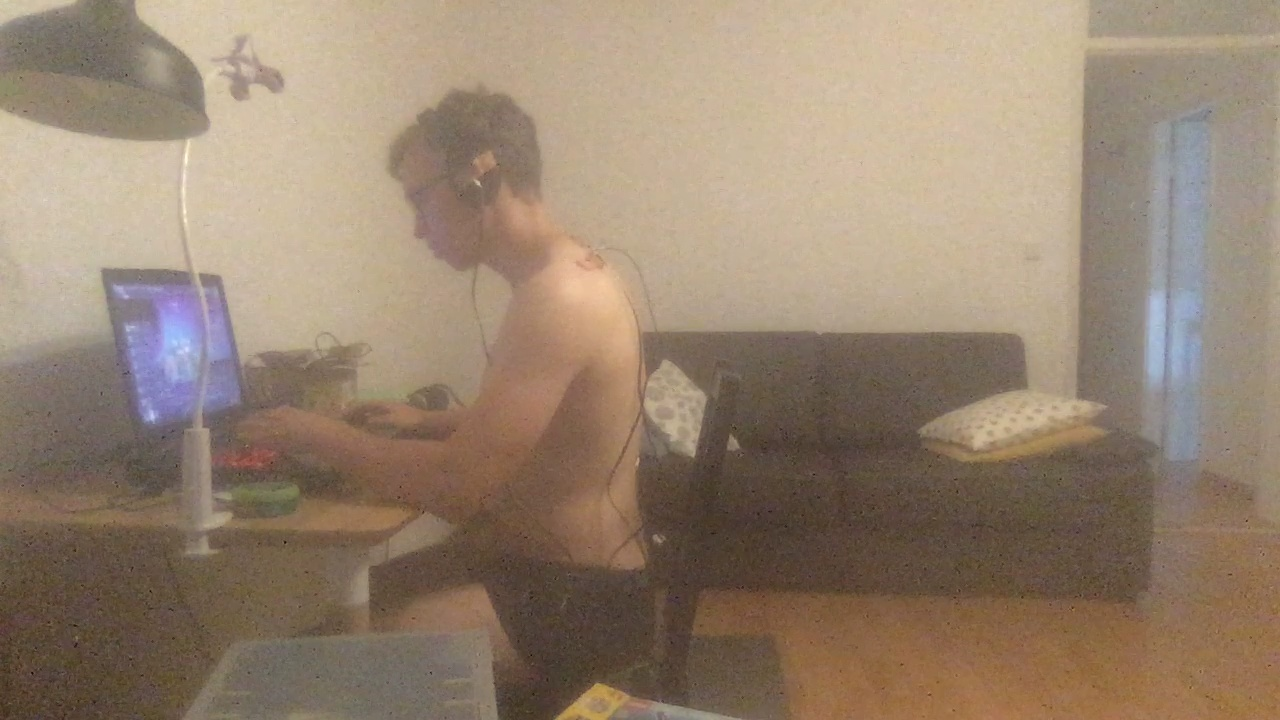

bad


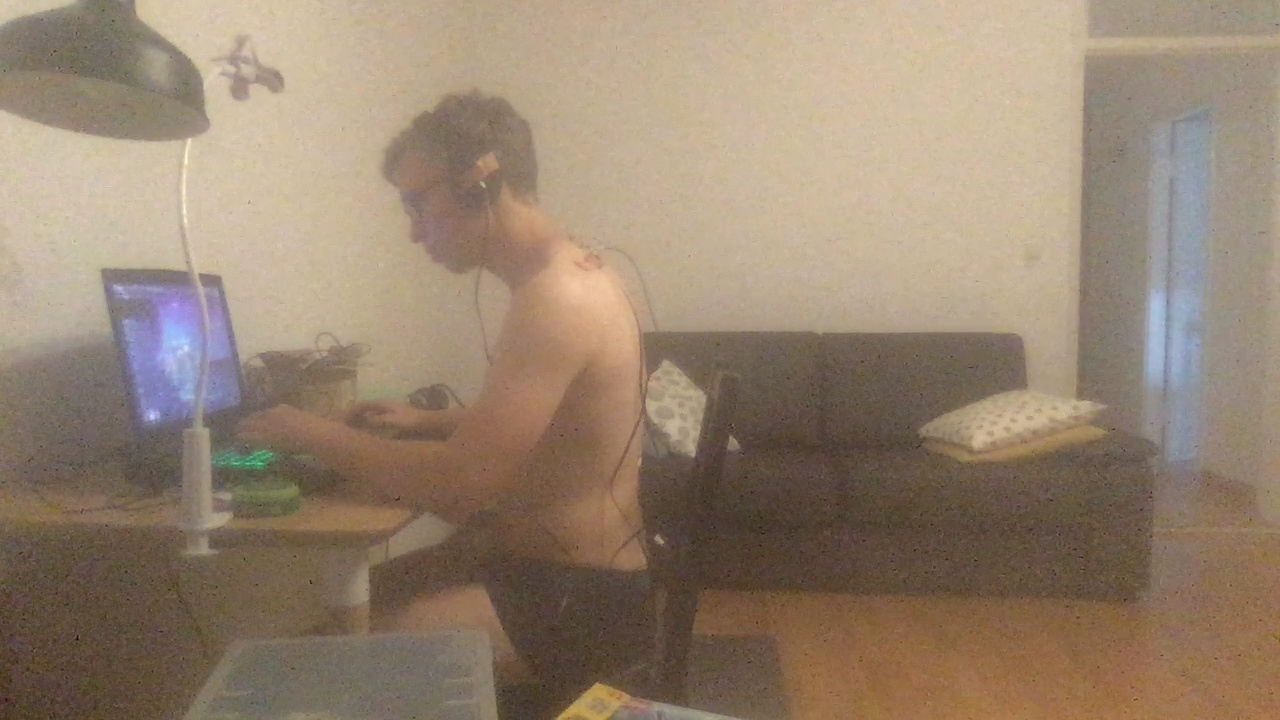

bad


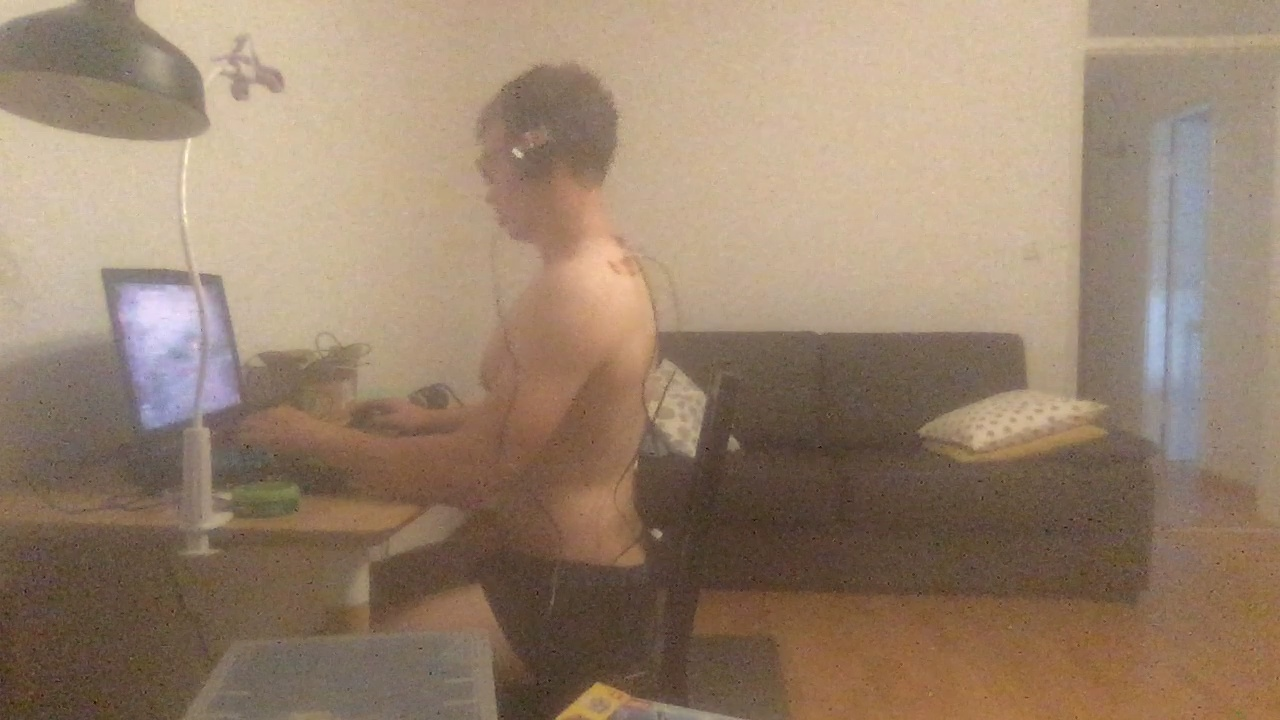

good


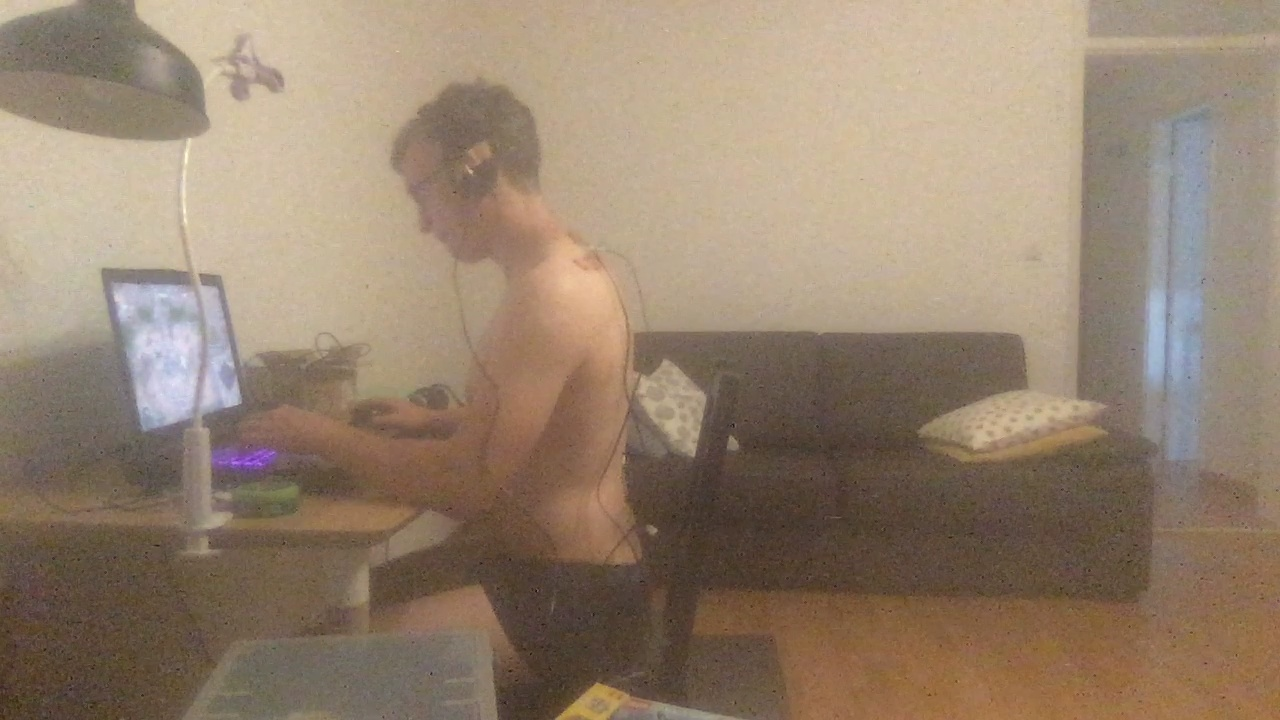

bad


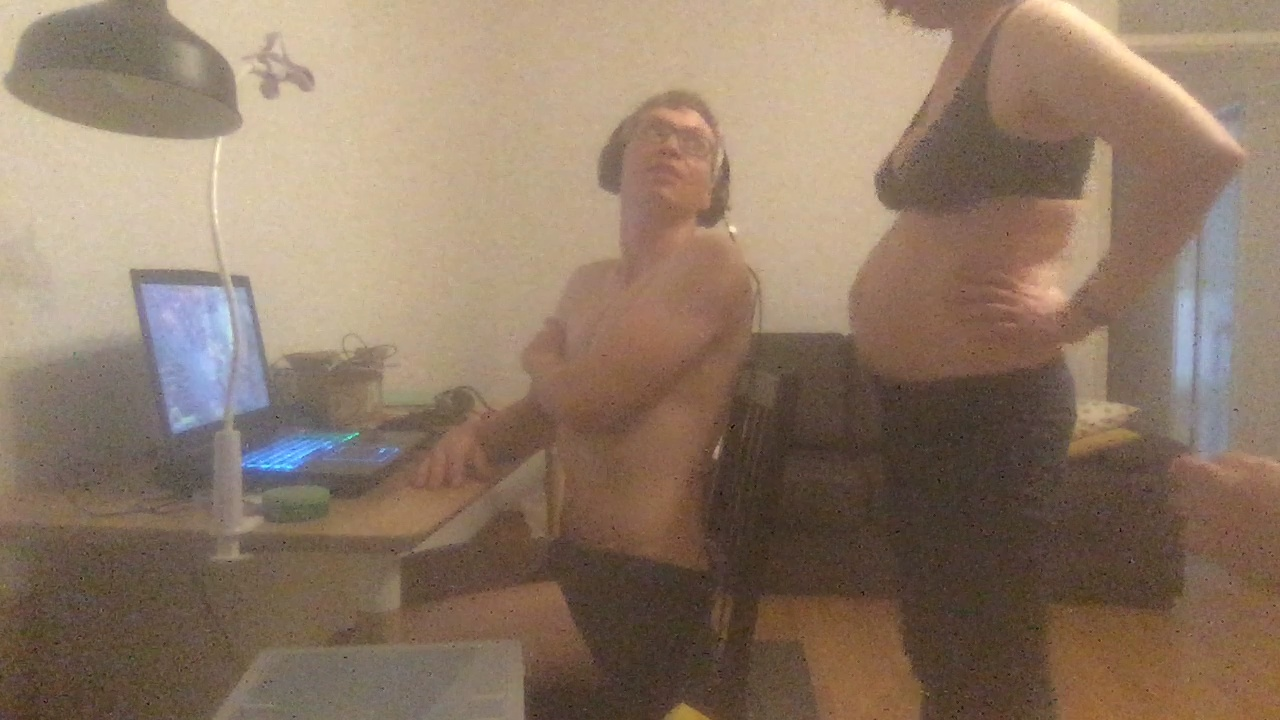

good


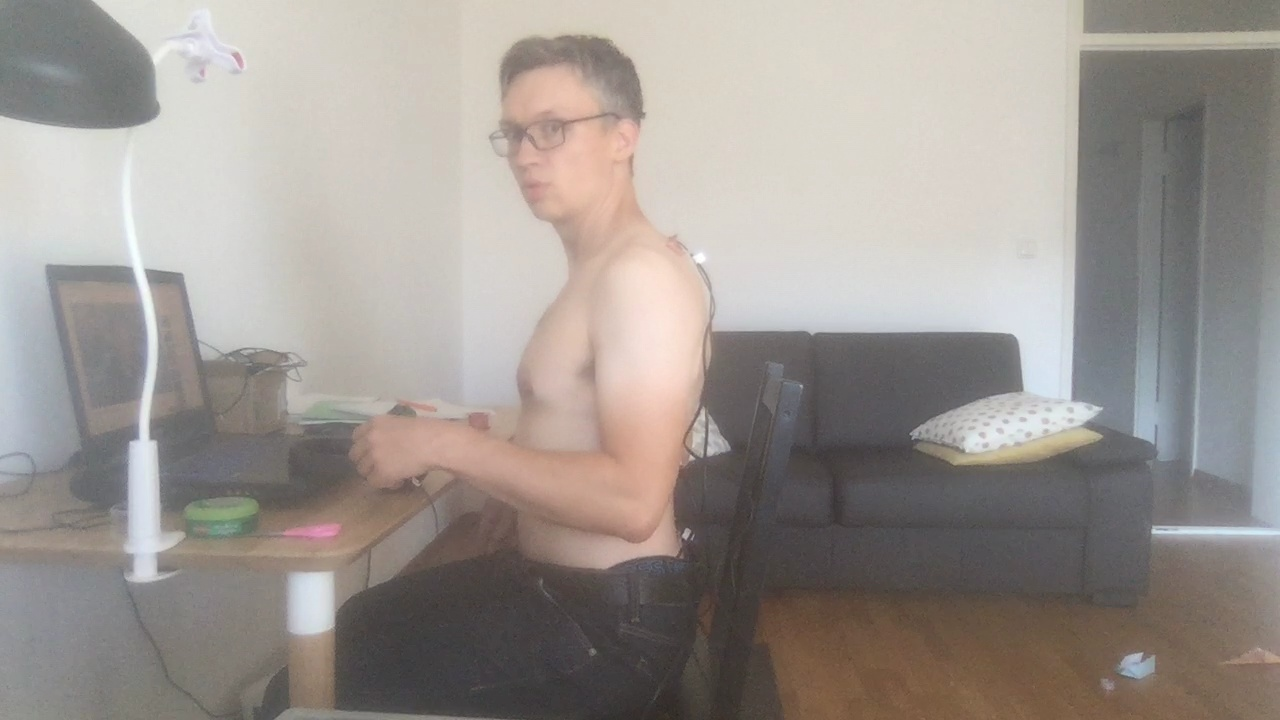

good


In [327]:
for i in range(len(Z)):
    if Z[i] == 0:
        continue
    display(Image(str(P[i]['1']['time']) + '.jpg'))
    print(P[i]['label'])